<a href="https://colab.research.google.com/github/sunnysakib/Data_Visualization/blob/main/Logistic_Regression_lab8_2019_3_60_028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("health care diabetes.csv") #load the dataset

In [ ]:
data.head()  #show the rows from the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum() # check null value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Steps To Be followed When Applying an Algorithm

- Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
- Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
- Then pass the training dataset to the algorithm to train it. We use the .fit() method
- Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
- We then check the accuracy by passing the predicted outcome and the actual output to the model.


In [ ]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve


In [ ]:
X= data.drop('Outcome', axis=1)
y=data['Outcome']

In [ ]:
train_X, test_X , train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=30)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train_X.shape)
print(test_X.shape)


(537, 8)
(231, 8)


In [ ]:
train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
739,1,102,74,0,0,39.5,0.293,42
559,11,85,74,0,0,30.1,0.300,35
651,1,117,60,23,106,33.8,0.466,27
368,3,81,86,16,66,27.5,0.306,22
191,9,123,70,44,94,33.1,0.374,40


In [ ]:
train_y.head()

739    1
559    0
651    0
368    0
191    0
Name: Outcome, dtype: int64

In [ ]:
# Fitting the model
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)


In [ ]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))


The accuracy of the Logistic Regression is 0.7965367965367965


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, prediction)
print('confusion matrix of test data : ' )
print(conf_matrix)

confusion matrix of test data : 
[[139  20]
 [ 27  45]]


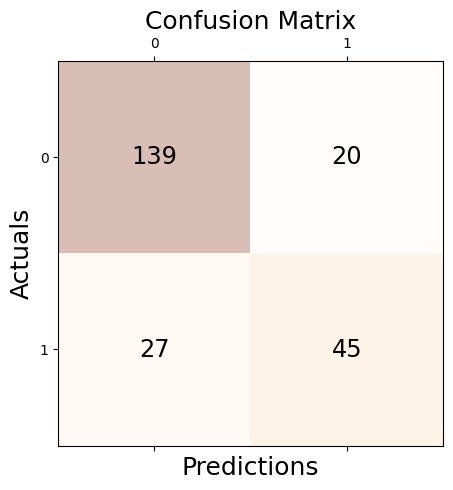

In [ ]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Precision Score = TP / (FP + TP)
#Average is required for multiclass/multilabel targets. If None, the scores for each class are returned.
# Otherwise, this determines the type of averaging performed on the data

precision_score(test_y, prediction, average=None)

array([0.8373494 , 0.69230769])

In [ ]:
# Recall Score = TP / (FN + TP)

recall_score(test_y, prediction, average=None)

array([0.87421384, 0.625     ])

In [ ]:
# F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)

f1_score(test_y, prediction, average=None)

array([0.85538462, 0.65693431])

In [ ]:
for col in range(test_X.shape[1]):
    tpr,fpr = [],[]
    for threshold in np.linspace(min(test_X[:,col]),max(test_X[:,col]),10):
        detP = test_X[:,col] < threshold
        tpr.append(sum(detP & test_y_)/sum(y_))# TP/P, aka recall
        fpr.append(sum(detP & (~test_y_))/sum((~test_y_)))# FP/N

    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label=data.feature_names[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Iris features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

InvalidIndexError: ignored

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


ValueError: ignored